In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 0. Загрузка данных

In [5]:
df = pd.read_csv('../content/IDS_Data1.csv')
df.head()

,Sport,TotPkts,TotBytes,SrcPkts,DstPkts,SrcBytes,service,flag,protocol_type,count,srv_count,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_bytes,class
0,143,2,180,2,0,180,ftp_data,SF,tcp,2,2,150,0.17,0.03,0,normal
1,68,2,684,2,0,684,other,SF,udp,13,1,255,0.00,0.60,0,normal
2,0,1,60,1,0,60,private,S0,tcp,123,6,255,0.10,0.05,0,anomaly
3,54949,10,628,4,6,248,http,SF,tcp,5,5,30,1.00,0.00,8153,normal
4,54943,8,496,4,4,248,http,SF,tcp,30,32,255,1.00,0.00,420,normal


## 1. Первичный и визуальный анализ данных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sport                   25192 non-null  int64  
 1   TotPkts                 25192 non-null  int64  
 2   TotBytes                25192 non-null  int64  
 3   SrcPkts                 25192 non-null  int64  
 4   DstPkts                 25192 non-null  int64  
 5   SrcBytes                25192 non-null  int64  
 6   service                 25192 non-null  object 
 7   flag                    25192 non-null  object 
 8   protocol_type           25192 non-null  object 
 9   count                   25192 non-null  int64  
 10  srv_count               25192 non-null  int64  
 11  dst_host_count          25192 non-null  int64  
 12  dst_host_same_srv_rate  25192 non-null  float64
 13  dst_host_diff_srv_rate  25192 non-null  float64
 14  dst_bytes               25192 non-null

In [7]:
df.isna().sum()

Sport                     0
TotPkts                   0
TotBytes                  0
SrcPkts                   0
DstPkts                   0
SrcBytes                  0
service                   0
flag                      0
protocol_type             0
count                     0
srv_count                 0
dst_host_count            0
dst_host_same_srv_rate    0
dst_host_diff_srv_rate    0
dst_bytes                 0
class                     0
dtype: int64

В датасете 25192 наблюдения, 16 признаков: 12 вещественных и 4 категориальных. Пропусков нет. Целевой признак - `class`.

In [8]:
df.describe()

,Sport,TotPkts,TotBytes,SrcPkts,DstPkts,SrcBytes,count,srv_count,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_bytes
count,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,2.519200e+04
mean,57444.728168,19.738568,1427.790013,10.428072,9.310495,800.189663,84.591180,27.698754,182.532074,0.519791,0.082539,3.491847e+03
std,6958.325958,16.517261,4403.278994,9.532412,7.042980,3192.733984,114.673451,72.468242,98.993895,0.448944,0.187191,8.883072e+04
min,0.000000,1.000000,60.000000,1.000000,0.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,55078.000000,18.000000,1152.000000,10.000000,8.000000,644.000000,2.000000,2.000000,84.000000,0.050000,0.000000,0.000000e+00
50%,58224.500000,20.000000,1276.000000,10.000000,10.000000,644.000000,14.000000,8.000000,255.000000,0.510000,0.030000,0.000000e+00
75%,61375.250000,20.000000,1276.000000,10.000000,10.000000,644.000000,144.000000,18.000000,255.000000,1.000000,0.070000,5.302500e+02
max,65534.000000,360.000000,91280.000000,210.000000,150.000000,66080.000000,511.000000,511.000000,255.000000,1.000000,1.000000,5.151385e+06


In [17]:
num_features = list(df.select_dtypes(['int64', 'float64']).columns)
cat_features = list(df.select_dtypes(['object']).columns)
target_feature = cat_features.pop()

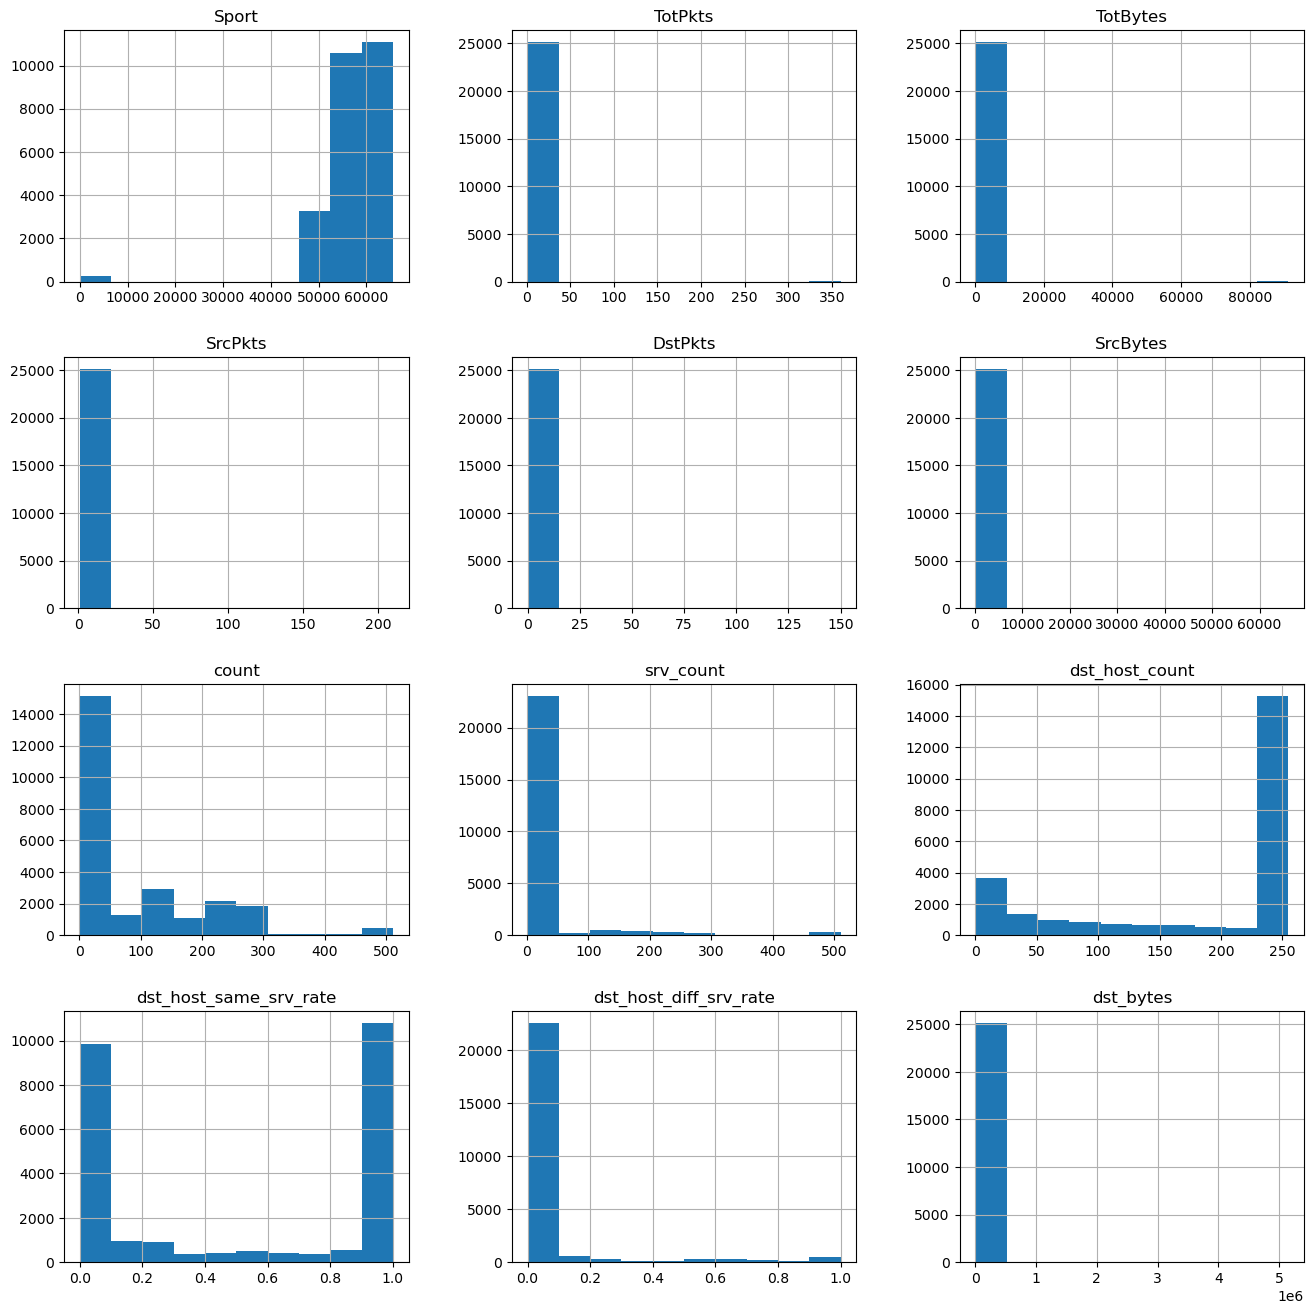

In [21]:
df.hist(num_features, figsize=(16, 16));

In [35]:
for cat_feature in cat_features:
    print(df[cat_feature].value_counts())
    print(50 * '*')

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64
**************************************************
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64
**************************************************
tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64
**************************************************


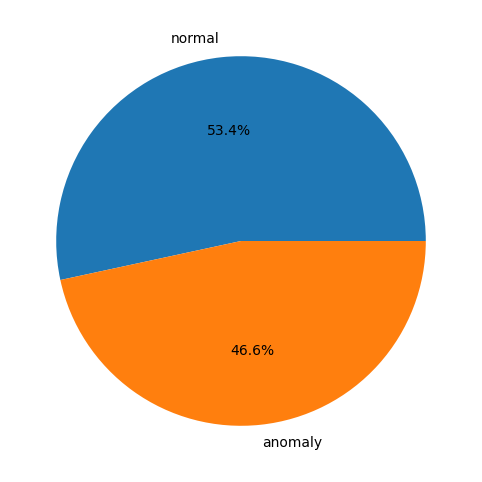

In [27]:
df_to_pie = df[target_feature].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(df_to_pie.values, labels=df_to_pie.index, autopct='%.1f%%');

Все вещественные признаки имеют выбросы. Целевой признак распределен практически равномерно.

Категориальный признак `service` имеет 66 различных значений, `flag` – 11.

## 2. Базовое решение

Признак `CustomerID` выступает в роли счетчика и не несёт смысловой нагрузки.

In [10]:
num_features.remove('CustomerID')

## 3. Предобработка данных

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

num_pipe = make_pipeline(
    MinMaxScaler()
)

cat_pipe = make_pipeline(
    OneHotEncoder(handle_unknown="ignore")          # игнорирование неопознанных данных на тесте или в рабочих данных
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_features),
        ("cat", cat_pipe, ['Gender']),
    ]
)


In [12]:
df_transform = preprocessor.fit_transform(df)

In [13]:
# имена колонок
col_names = num_features.copy()
col_names.append('Gender_Female')
col_names.append('Gender_Male')

In [14]:
df_transform = pd.DataFrame(df_transform, columns=col_names)
df_transform

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,0.019231,0.000000,0.387755,0.0,1.0
1,0.057692,0.000000,0.816327,0.0,1.0
2,0.038462,0.008197,0.051020,1.0,0.0
3,0.096154,0.008197,0.775510,1.0,0.0
4,0.250000,0.016393,0.397959,1.0,0.0
...,...,...,...,...,...
195,0.326923,0.860656,0.795918,1.0,0.0
196,0.519231,0.909836,0.275510,1.0,0.0
197,0.269231,0.909836,0.744898,0.0,1.0
198,0.269231,1.000000,0.173469,0.0,1.0


## 4. Обучение моделей

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def reduce_dims(df, dims=2, method='pca', perplexity=30):

    assert method in ['pca', 'tsne'], 'Неверно указан метод'

    if method == 'pca':
        dim_reducer = PCA(n_components=dims, random_state=42)
        components = dim_reducer.fit_transform(df)
    elif method == 'tsne':
        dim_reducer = TSNE(n_components=dims, random_state=42, perplexity=perplexity)
        components = dim_reducer.fit_transform(df)
    else:
        print('Error')

    colnames = ['component_' + str(i) for i in range(1, dims+1)]
    return dim_reducer, pd.DataFrame(data = components, columns = colnames)

In [16]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2',
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')
    plt.show()

In [17]:
dim_reducer2d, components_2d = reduce_dims(df_transform, dims=2, method='tsne')
components_2d.head(2)

,component_1,component_2
0,27.065092,-0.272301
1,29.196939,0.417369


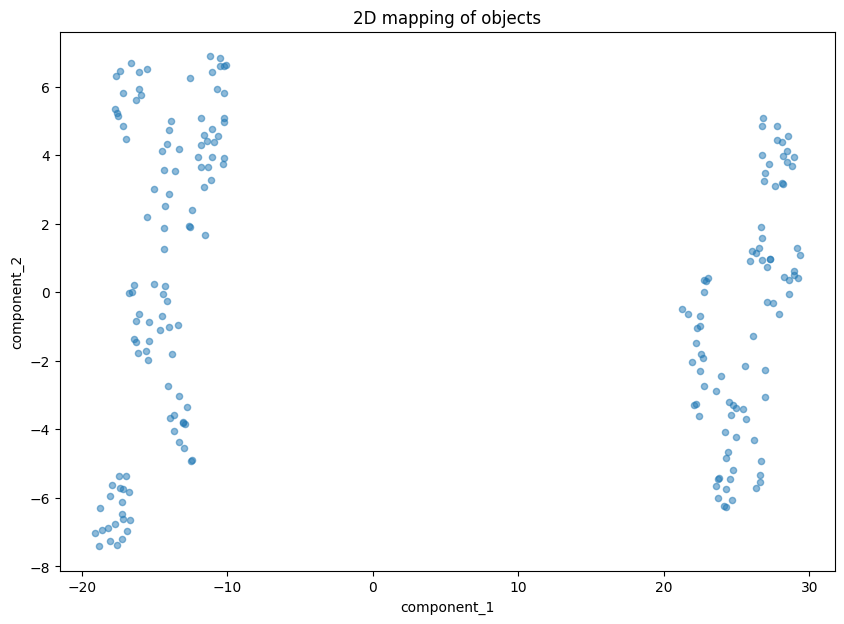

In [18]:
display_components_in_2D_space(components_2d)

## 5. Feature Engineering

### 5.1 KMeans

In [20]:
def display_clusters_distribution(unique, counts):
    """Визуализация распределения классов по кластерам"""
    plt.figure(figsize=(8,5))

    plt.bar(unique, counts)

    plt.xlabel('Clusters')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title('Clusters distribution')
    plt.show()

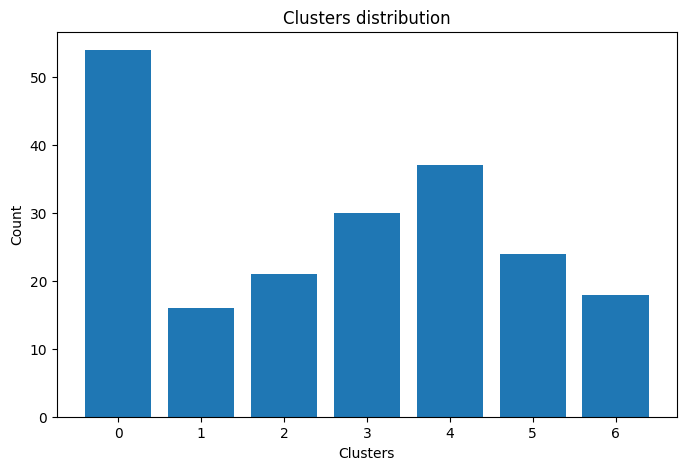

In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42)
labels_clast_km = kmeans.fit_predict(df_transform)

unique, counts = np.unique(pd.Series(labels_clast_km), return_counts=True)
display_clusters_distribution(unique, counts)

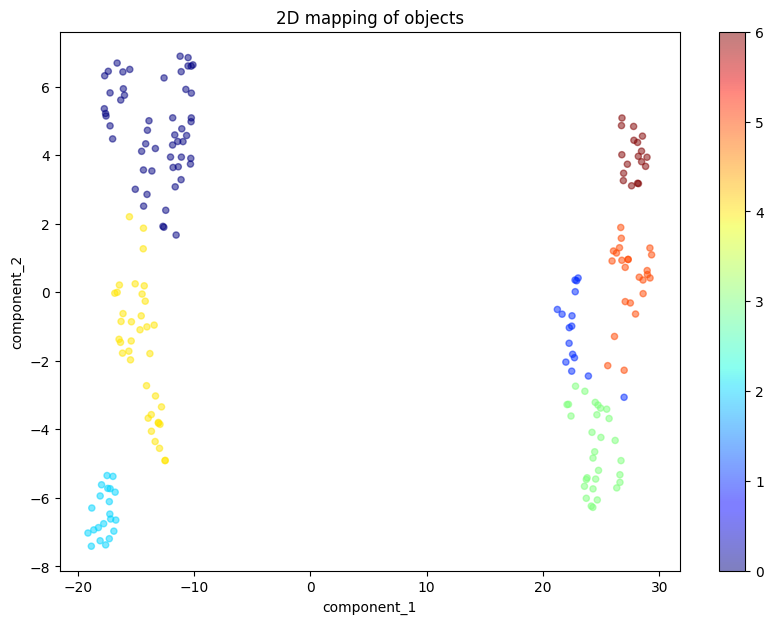

In [64]:
display_components_in_2D_space(components_2d, labels_clast_km)

### 5.2 DBSCAN

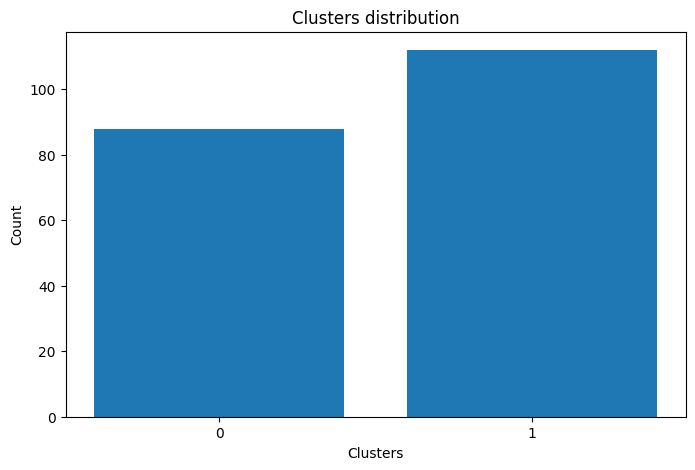

In [61]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.5, min_samples=5)
labels_clast_db = dbscan.fit_predict(df_transform)


unique, counts = np.unique(pd.Series(labels_clast_db), return_counts=True)
display_clusters_distribution(unique, counts)

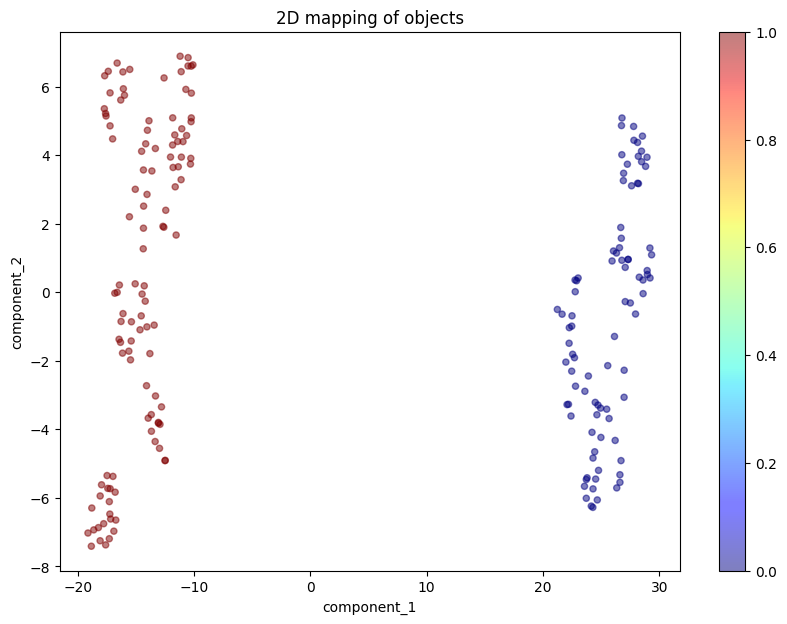

In [62]:
display_components_in_2D_space(components_2d, labels_clast_db)

## 6. Оптимальные параметры модели

In [46]:
from scipy.spatial.distance import cdist

In [49]:
def apply_elbow_method_kmeans(X):
    """Визуализация метода 'локтя' для модели кластеризации KMeans"""

    distortions = []
    K = range(2,30)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=33).fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

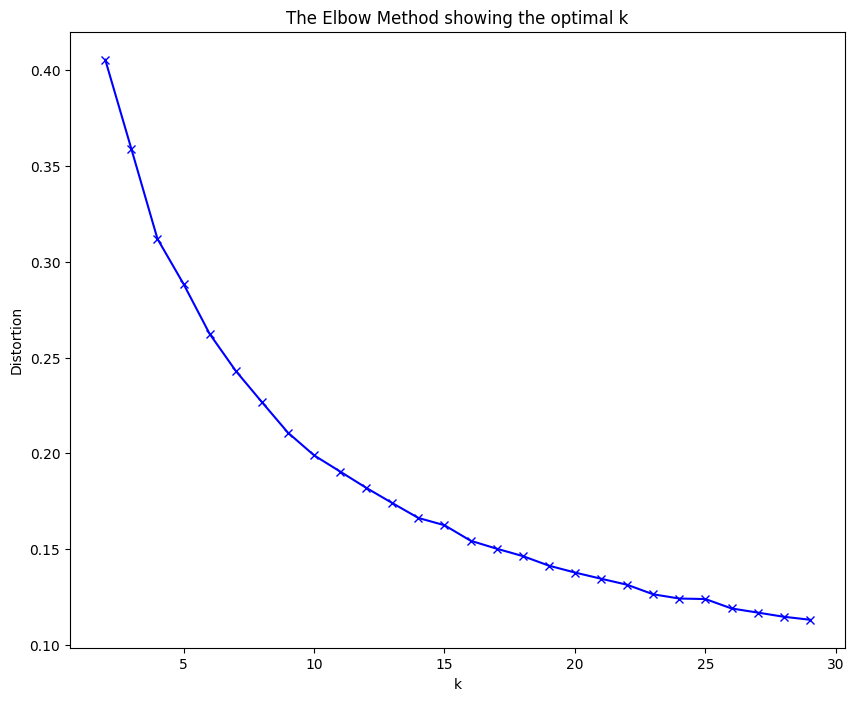

CPU times: user 4.09 s, sys: 109 ms, total: 4.2 s
Wall time: 2.84 s


In [50]:
%%time
apply_elbow_method_kmeans(df_transform)

## 7. Выводы о работе